# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from scipy import stats
import seaborn as sns
sns.set()

# Reading the data

In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv') 
data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Scaling the data

In [3]:
Min_max = preprocessing.MinMaxScaler(feature_range = (0,1))

cols = data.columns
data[cols] = Min_max.fit_transform(data[cols])

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,1.0


# Removing Outliers

In [4]:
z_score = np.abs(stats.zscore(data))
threshold = 3
print(np.where(z_score > threshold))

(array([  1,   4,   9,  19,  28,  52,  52,  60,  64,  72, 103, 105, 109,
       131, 134, 171, 199, 217, 228, 296], dtype=int64), array([2, 8, 7, 8, 7, 2, 7, 2, 4, 2, 2, 6, 6, 7, 2, 2, 8, 7, 7, 6],
      dtype=int64))


In [5]:
data = data[(z_score < 3).all(axis=1)]
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,0.381320,0.435714,0.055336,0.417857,0.361147,0.360714,0.283331,0.087123,0.680714,0.653571,0.314286,0.457994,0.307143
std,0.214824,0.496738,0.068526,0.494089,0.173795,0.481068,0.103777,0.069185,0.112120,0.476684,0.465062,0.274675,0.462135
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.314286,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.000000,0.011674,0.000000,0.242424,0.000000,0.225058,0.044944,0.600000,0.000000,0.000000,0.249110,0.000000
50%,0.363636,0.000000,0.027622,0.000000,0.363636,0.000000,0.285974,0.067416,0.685714,1.000000,0.000000,0.411032,0.000000
75%,0.545455,1.000000,0.071319,1.000000,0.469697,1.000000,0.335677,0.101124,0.771429,1.000000,1.000000,0.716192,1.000000
max,1.000000,1.000000,0.353534,1.000000,0.772727,1.000000,0.627834,0.438202,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
X = data.iloc[:,:12].to_numpy()
y = data.iloc[:,12:].to_numpy()
y = np.ravel(y)

# Splitting the Data

In [7]:
split_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split_size, random_state = 64)
y_train = np.ravel(y_train)
y_test = np.reshape(y_test,(-1,1))
# X_train.shape

# KNN Classifier

Cross Validation

In [8]:
for i in range(2,15):
    neighbors = KNeighborsClassifier(n_neighbors = i)
    results = cross_validate(neighbors,X, y,cv=5, return_train_score= True)
    print("Cross validation scores with n_neighbours: ",i)
    print("The fit time is:", results['fit_time'])
    print("The score time is:", results['score_time'])
    print("The test score is:", results['test_score'])
    print("The train score is:", results['train_score'])
    print("\n****************************************************************************\n")

Cross validation scores with n_neighbours:  2
The fit time is: [0.00200009 0.0010004  0.0009973  0.0009973  0.        ]
The score time is: [0.00497961 0.00399303 0.00199461 0.00199437 0.00398993]
The test score is: [0.66071429 0.75       0.73214286 0.67857143 0.69642857]
The train score is: [0.79910714 0.80357143 0.79017857 0.79910714 0.82142857]

****************************************************************************

Cross validation scores with n_neighbours:  3
The fit time is: [0.0009973  0.         0.         0.0009973  0.00099659]
The score time is: [0.00299191 0.00299191 0.00299382 0.00199461 0.00099707]
The test score is: [0.5        0.73214286 0.73214286 0.71428571 0.69642857]
The train score is: [0.82589286 0.83482143 0.81696429 0.83035714 0.85267857]

****************************************************************************

Cross validation scores with n_neighbours:  4
The fit time is: [0.00099659 0.0009973  0.00099826 0.         0.00098896]
The score time is: [0.00

1.) Finding the best N_Neighbors from graph


In [9]:
training_score = []
testing_score = []

for i in range(2,15):
    neighbors = KNeighborsClassifier(n_neighbors = i)
    neighbors.fit(X_train,y_train)
    training_score.append(neighbors.score(X_train,y_train))
    testing_score.append(neighbors.score(X_test,y_test))

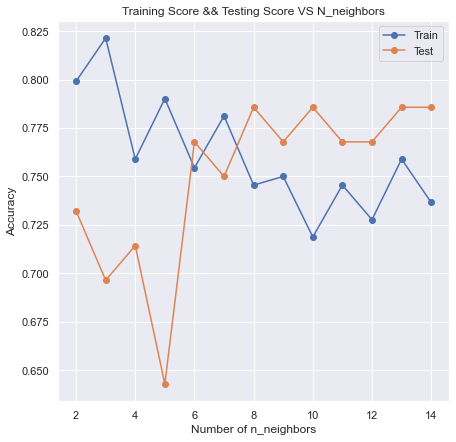

In [10]:
n = [i for i in range(2,15)]
# plt.plot(nodes,training_score)
# plt.plot(nodes,testing_score)
# plt.show()

plt.figure(figsize=(7,7))
plt.plot(n, training_score, '-o', label='Train')
plt.plot(n, testing_score, '-o', label='Test')
plt.title('Training Score && Testing Score VS N_neighbors')
plt.xlabel("Number of n_neighbors")
plt.ylabel("Accuracy")
plt.axis()
plt.legend()
plt.show()

2.) Finding the best model manually (tweaking some extra parameters)

In [11]:
neighbors = KNeighborsClassifier(n_neighbors = 2, weights = 'uniform')
neighbors.fit(X_train,y_train)
print("Training score: ", neighbors.score(X_train,y_train))
print("Testing score: ", neighbors.score(X_test,y_test))

Training score:  0.7991071428571429
Testing score:  0.7321428571428571


In [12]:
neighbors = KNeighborsClassifier(n_neighbors = 2, weights = 'distance')
neighbors.fit(X_train,y_train)
print("Training score: ", neighbors.score(X_train,y_train))
print("Testing score: ", neighbors.score(X_test,y_test))

Training score:  1.0
Testing score:  0.6428571428571429


In [13]:
neighbors = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform')
neighbors.fit(X_train,y_train)
print("Training score: ", neighbors.score(X_train,y_train))
print("Testing score: ", neighbors.score(X_test,y_test))

Training score:  0.8214285714285714
Testing score:  0.6964285714285714


In [14]:
neighbors = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
neighbors.fit(X_train,y_train)
print("Training score: ", neighbors.score(X_train,y_train))
print("Testing score: ", neighbors.score(X_test,y_test))

Training score:  1.0
Testing score:  0.6607142857142857


In [15]:
neighbors = KNeighborsClassifier(n_neighbors = 4, weights = 'uniform')
neighbors.fit(X_train,y_train)
print("Training score: ", neighbors.score(X_train,y_train))
print("Testing score: ", neighbors.score(X_test,y_test))

Training score:  0.7589285714285714
Testing score:  0.7142857142857143


In [16]:
neighbors = KNeighborsClassifier(n_neighbors = 4, weights = 'distance')
neighbors.fit(X_train,y_train)
print("Training score: ", neighbors.score(X_train,y_train))
print("Testing score: ", neighbors.score(X_test,y_test))

Training score:  1.0
Testing score:  0.6607142857142857


In [17]:
neighbors = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')
neighbors.fit(X_train,y_train)
print("Training score: ", neighbors.score(X_train,y_train))
print("Testing score: ", neighbors.score(X_test,y_test))

Training score:  0.7901785714285714
Testing score:  0.6428571428571429


In [18]:
neighbors = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')
neighbors.fit(X_train,y_train)
print("Training score: ", neighbors.score(X_train,y_train))
print("Testing score: ", neighbors.score(X_test,y_test))

Training score:  1.0
Testing score:  0.6785714285714286


In [19]:
neighbors = KNeighborsClassifier(n_neighbors = 6, weights = 'uniform')
neighbors.fit(X_train,y_train)
print("Training score: ", neighbors.score(X_train,y_train))
print("Testing score: ", neighbors.score(X_test,y_test))

Training score:  0.7544642857142857
Testing score:  0.7678571428571429


In [20]:
neighbors = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
neighbors.fit(X_train,y_train)
print("Training score: ", neighbors.score(X_train,y_train))
print("Testing score: ", neighbors.score(X_test,y_test))

Training score:  1.0
Testing score:  0.6785714285714286


In [21]:
neighbors = KNeighborsClassifier(n_neighbors = 7, weights = 'uniform')
neighbors.fit(X_train,y_train)
print("Training score: ", neighbors.score(X_train,y_train))
print("Testing score: ", neighbors.score(X_test,y_test))

Training score:  0.78125
Testing score:  0.75


In [22]:
neighbors = KNeighborsClassifier(n_neighbors = 7, weights = 'distance')
neighbors.fit(X_train,y_train)
print("Training score: ", neighbors.score(X_train,y_train))
print("Testing score: ", neighbors.score(X_test,y_test))

Training score:  1.0
Testing score:  0.75


In [23]:
neighbors = KNeighborsClassifier(n_neighbors = 8, weights = 'uniform')
neighbors.fit(X_train,y_train)
print("Training score: ", neighbors.score(X_train,y_train))
print("Testing score: ", neighbors.score(X_test,y_test))

Training score:  0.7455357142857143
Testing score:  0.7857142857142857


In [24]:
neighbors = KNeighborsClassifier(n_neighbors = 8, weights = 'distance')
neighbors.fit(X_train,y_train)
print("Training score: ", neighbors.score(X_train,y_train))
print("Testing score: ", neighbors.score(X_test,y_test))

Training score:  1.0
Testing score:  0.8035714285714286


In [25]:
neighbors = KNeighborsClassifier(n_neighbors = 9, weights = 'uniform')
neighbors.fit(X_train,y_train)
print("Training score: ", neighbors.score(X_train,y_train))
print("Testing score: ", neighbors.score(X_test,y_test))

Training score:  0.75
Testing score:  0.7678571428571429


In [26]:
neighbors = KNeighborsClassifier(n_neighbors = 9, weights = 'distance')
neighbors.fit(X_train,y_train)
print("Training score: ", neighbors.score(X_train,y_train))
print("Testing score: ", neighbors.score(X_test,y_test))

Training score:  1.0
Testing score:  0.7678571428571429


Best KNN Model

In [27]:
neighbors = KNeighborsClassifier(n_neighbors = 6, weights = 'uniform')
neighbors.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [28]:
Predicted_values = neighbors.predict(X_test)
Predicted_values 

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1.])

In [31]:
print("The training accuracy is:", neighbors.score(X_train,y_train))
print("The testing accuracy is:", neighbors.score(X_test,y_test),"\n")

detailed_summary = precision_recall_fscore_support(y_test, Predicted_values)
print("The precision for the model is:",detailed_summary[0])
print("The recall for the model is:",detailed_summary[1])
print("The F-score for the model is:",detailed_summary[2])
print("\n**************************************************\n")
detailed_summary = precision_recall_fscore_support(y_test, Predicted_values, average='binary')
print("For 'BINARY' average:")
print("The precision for the model is:",detailed_summary[0])
print("The recall for the model is:",detailed_summary[1])
print("The F-score for the model is:",detailed_summary[2])
print("\n**************************************************\n")
detailed_summary = precision_recall_fscore_support(y_test, Predicted_values, average='micro')
print("For 'MICRO' average:")
print("The precision for the model is:",detailed_summary[0])
print("The recall for the model is:",detailed_summary[1])
print("The F-score for the model is:",detailed_summary[2])
print("\n**************************************************\n")
detailed_summary = precision_recall_fscore_support(y_test, Predicted_values, average='macro')
print("For 'MACRO' average:")
print("The precision for the model is:",detailed_summary[0])
print("The recall for the model is:",detailed_summary[1])
print("The F-score for the model is:",detailed_summary[2])
print("\n**************************************************\n")
detailed_summary = precision_recall_fscore_support(y_test, Predicted_values, average='weighted')
print("For 'WEIGHTED' average:")
print("The precision for the model is:",detailed_summary[0])
print("The recall for the model is:",detailed_summary[1])
print("The F-score for the model is:",detailed_summary[2])
print("\n**************************************************")

The training accuracy is: 0.7544642857142857
The testing accuracy is: 0.7678571428571429 

The precision for the model is: [0.78       0.66666667]
The recall for the model is: [0.95121951 0.26666667]
The F-score for the model is: [0.85714286 0.38095238]

**************************************************

For 'BINARY' average:
The precision for the model is: 0.6666666666666666
The recall for the model is: 0.26666666666666666
The F-score for the model is: 0.3809523809523809

**************************************************

For 'MICRO' average:
The precision for the model is: 0.7678571428571429
The recall for the model is: 0.7678571428571429
The F-score for the model is: 0.7678571428571429

**************************************************

For 'MACRO' average:
The precision for the model is: 0.7233333333333334
The recall for the model is: 0.6089430894308943
The F-score for the model is: 0.619047619047619

**************************************************

For 'WEIGHTED' average:
Th

In [32]:
accuracy_score(y_test, Predicted_values)

0.7678571428571429

In [33]:
confusion_matrix(y_test, Predicted_values)

array([[39,  2],
       [11,  4]], dtype=int64)

In [37]:
print(classification_report(y_test, Predicted_values))

              precision    recall  f1-score   support

         0.0       0.78      0.95      0.86        41
         1.0       0.67      0.27      0.38        15

    accuracy                           0.77        56
   macro avg       0.72      0.61      0.62        56
weighted avg       0.75      0.77      0.73        56



# Naïve Bayes Classifier


Cross Validation

In [38]:
for i in range(-10,10,5):
    nb = GaussianNB(var_smoothing = pow(10,i))
    results = cross_validate(nb,X,y,cv=5, return_train_score= True)
    print("Cross validation scores with var smoothing: ", pow(10,i))
    print("The fit time is:", results['fit_time'])
    print("The score time is:", results['score_time'])
    print("The test score is:", results['test_score'])
    print("The train score is:", results['train_score'])
    print("\n****************************************************************************\n")

Cross validation scores with var smoothing:  1e-10
The fit time is: [0.0019896  0.00099707 0.         0.00099492 0.00199604]
The score time is: [0.00102329 0.         0.0009973  0.         0.00100088]
The test score is: [0.69642857 0.82142857 0.82142857 0.89285714 0.71428571]
The train score is: [0.875      0.8125     0.81696429 0.80803571 0.875     ]

****************************************************************************

Cross validation scores with var smoothing:  1e-05
The fit time is: [0.0010016  0.00099611 0.0010004  0.0009973  0.00204635]
The score time is: [0.00095987 0.         0.         0.00099683 0.00099635]
The test score is: [0.69642857 0.82142857 0.82142857 0.89285714 0.71428571]
The train score is: [0.875      0.8125     0.81696429 0.80803571 0.875     ]

****************************************************************************

Cross validation scores with var smoothing:  1
The fit time is: [0.0009923  0.00099635 0.00099564 0.         0.00096965]
The score tim

1.) Finding best var smoothing value from graph

In [39]:
training_score = []
testing_score = []

for i in range(-10,10,5):
    nb = GaussianNB(var_smoothing = pow(10,i))
    nb.fit(X_train,y_train)
    training_score.append(nb.score(X_train,y_train))
    testing_score.append(nb.score(X_test,y_test))

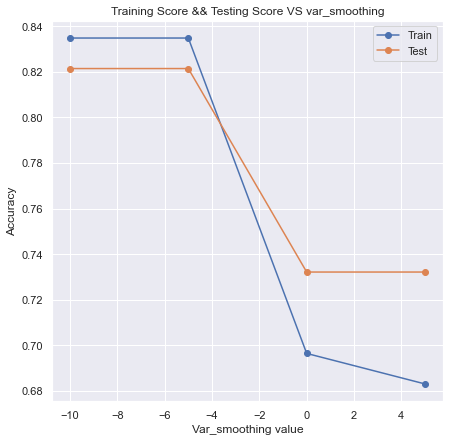

In [40]:
var_smooth = [i for i in range(-10,10,5)]
# plt.plot(nodes,training_score)
# plt.plot(nodes,testing_score)
# plt.show()

plt.figure(figsize=(7,7))
plt.plot(var_smooth, training_score, '-o', label='Train')
plt.plot(var_smooth, testing_score, '-o', label='Test')
plt.title('Training Score && Testing Score VS var_smoothing')
plt.xlabel("Var_smoothing value")
plt.ylabel("Accuracy")
plt.axis()
plt.legend()
plt.show()

2.) Finding best model manually

In [41]:
for i in range(-10,10,2):
    nb = GaussianNB(var_smoothing = pow(10,i))
    nb.fit(X_train,y_train)
    print("Testing scores with var smoothing: ", pow(10,i))
    print("Training score: ", nb.score(X_train,y_train))
    print("Testing score: ", nb.score(X_test,y_test))
    print("\n****************************************************************************\n")
    

Testing scores with var smoothing:  1e-10
Training score:  0.8348214285714286
Testing score:  0.8214285714285714

****************************************************************************

Testing scores with var smoothing:  1e-08
Training score:  0.8348214285714286
Testing score:  0.8214285714285714

****************************************************************************

Testing scores with var smoothing:  1e-06
Training score:  0.8348214285714286
Testing score:  0.8214285714285714

****************************************************************************

Testing scores with var smoothing:  0.0001
Training score:  0.8392857142857143
Testing score:  0.8214285714285714

****************************************************************************

Testing scores with var smoothing:  0.01
Training score:  0.8526785714285714
Testing score:  0.8392857142857143

****************************************************************************

Testing scores with var smoothing:  1
Tr

Best Naïve Bayes Classifier

In [42]:
nb = GaussianNB(var_smoothing = pow(10,-4))
nb.fit(X_train, y_train)

GaussianNB(var_smoothing=0.0001)

In [43]:
Predicted_values = nb.predict(X_test)
Predicted_values

array([1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1.])

In [44]:
print("The training accuracy is:", neighbors.score(X_train,y_train))
print("The testing accuracy is:", neighbors.score(X_test,y_test),"\n")

detailed_summary = precision_recall_fscore_support(y_test, Predicted_values)
print("The precision for the model is:",detailed_summary[0])
print("The recall for the model is:",detailed_summary[1])
print("The F-score for the model is:",detailed_summary[2])
print("\n**************************************************\n")
detailed_summary = precision_recall_fscore_support(y_test, Predicted_values, average='binary')
print("The precision for the model is:",detailed_summary[0])
print("The recall for the model is:",detailed_summary[1])
print("The F-score for the model is:",detailed_summary[2])
print("\n***************************************************")
detailed_summary = precision_recall_fscore_support(y_test, Predicted_values, average='micro')
print("For 'MICRO' average:")
print("The precision for the model is:",detailed_summary[0])
print("The recall for the model is:",detailed_summary[1])
print("The F-score for the model is:",detailed_summary[2])
print("\n**************************************************\n")
detailed_summary = precision_recall_fscore_support(y_test, Predicted_values, average='macro')
print("For 'MACRO' average:")
print("The precision for the model is:",detailed_summary[0])
print("The recall for the model is:",detailed_summary[1])
print("The F-score for the model is:",detailed_summary[2])
print("\n**************************************************\n")
detailed_summary = precision_recall_fscore_support(y_test, Predicted_values, average='weighted')
print("For 'WEIGHTED' average:")
print("The precision for the model is:",detailed_summary[0])
print("The recall for the model is:",detailed_summary[1])
print("The F-score for the model is:",detailed_summary[2])
print("\n**************************************************")

The training accuracy is: 0.7544642857142857
The testing accuracy is: 0.7678571428571429 

The precision for the model is: [0.8974359  0.64705882]
The recall for the model is: [0.85365854 0.73333333]
The F-score for the model is: [0.875  0.6875]

**************************************************

The precision for the model is: 0.6470588235294118
The recall for the model is: 0.7333333333333333
The F-score for the model is: 0.6875

***************************************************
For 'MICRO' average:
The precision for the model is: 0.8214285714285714
The recall for the model is: 0.8214285714285714
The F-score for the model is: 0.8214285714285714

**************************************************

For 'MACRO' average:
The precision for the model is: 0.7722473604826546
The recall for the model is: 0.7934959349593496
The F-score for the model is: 0.78125

**************************************************

For 'WEIGHTED' average:
The precision for the model is: 0.8303706097823744
The 

In [45]:
accuracy_score(y_test, Predicted_values)

0.8214285714285714

In [46]:
confusion_matrix(y_test, Predicted_values)

array([[35,  6],
       [ 4, 11]], dtype=int64)

In [47]:
print(classification_report(y_test, Predicted_values))

              precision    recall  f1-score   support

         0.0       0.90      0.85      0.88        41
         1.0       0.65      0.73      0.69        15

    accuracy                           0.82        56
   macro avg       0.77      0.79      0.78        56
weighted avg       0.83      0.82      0.82        56

